In [1]:
# import libbares

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
import sklearn

In [3]:
# for split the data set into training data and testing data

from  sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [4]:
#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [5]:
from IPython.display import display
import pandas as pd
import numpy as np #for mathematical calculation
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt # for plotting graphs
import missingno as msno
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings("ignore")

### data collection and preprocessing

In [6]:
data=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# loan_id is unique number means all person has a unique number so drop that columns
loan_data=data.drop(columns=["Loan_ID"],axis=1)
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# information about the dataset

print("Features name in the data set: ","\n",loan_data.columns)
print("======"*15)
print("Shape of the dataset(number of rows and columns):","\n",loan_data.shape)
print("======"*15)
print("Information about the dataset: ","\n",loan_data.info())

Features name in the data set:  
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Shape of the dataset(number of rows and columns): 
 (614, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null  

In [9]:
# statistical measures()

loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
numerical_features = loan_data.select_dtypes(include='number')
categorical_features = loan_data.select_dtypes(include='object')

In [11]:
numerical_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [12]:
numerical_features.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
categorical_features.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [14]:
categorical_features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
categorical_features.describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Y    422
N    192
Name: Loan_Status, dtype: int64

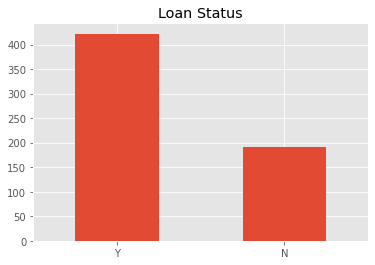

In [16]:
plt.style.use('ggplot')
loan_data['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(loan_data['Loan_Status'].value_counts())

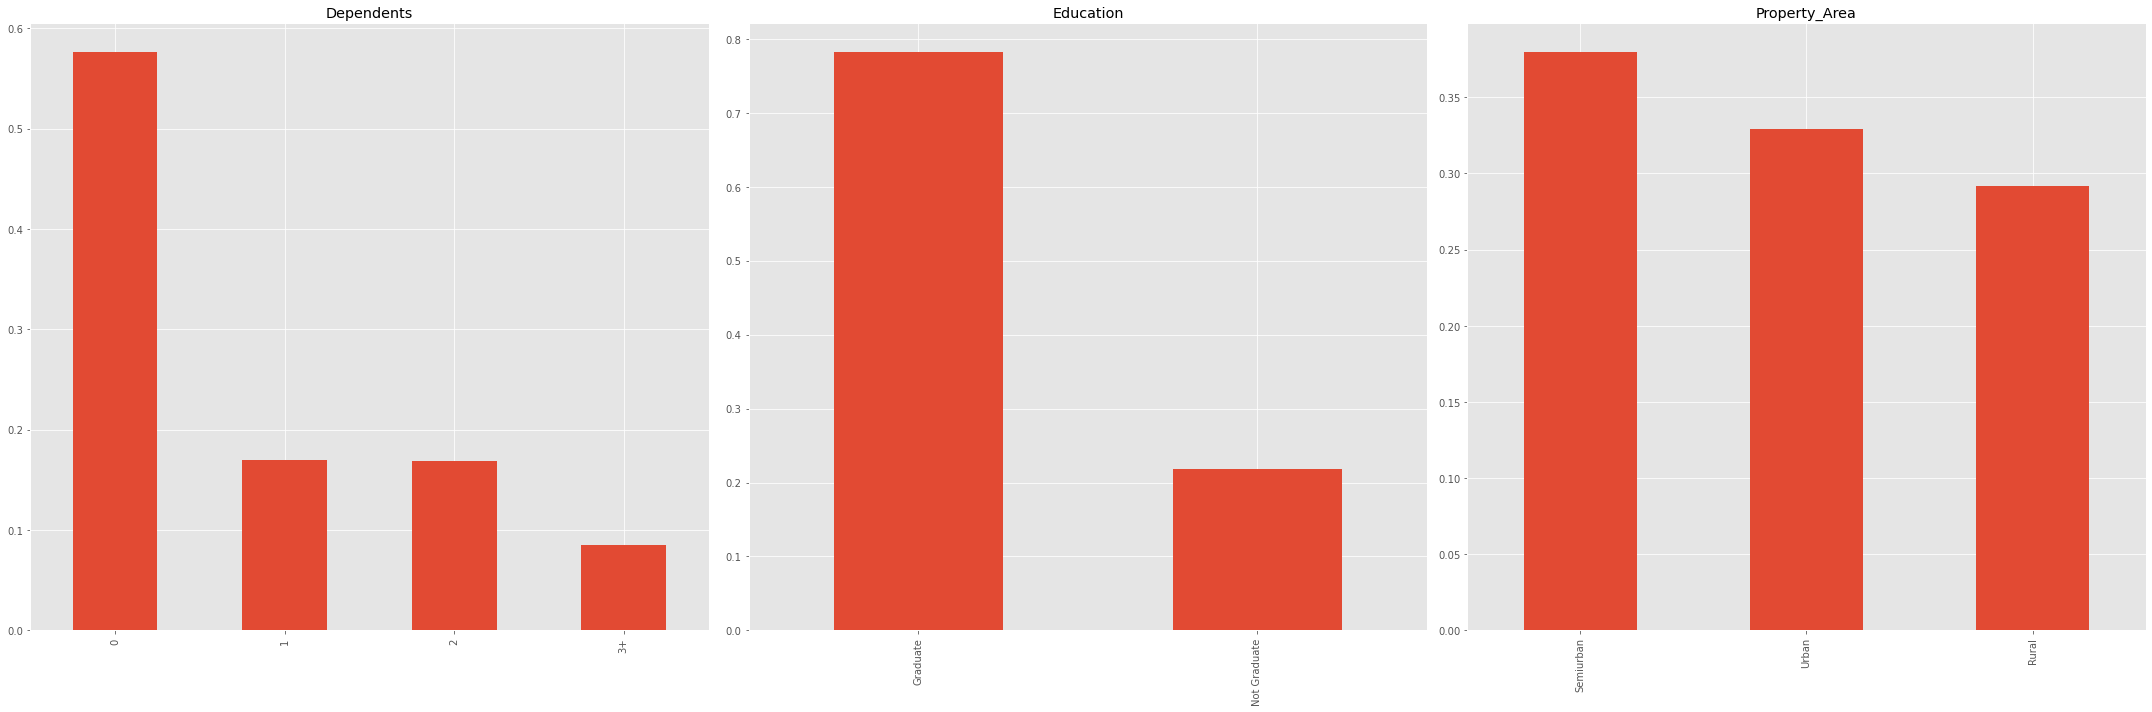

In [17]:
fig2, ax2= plt.subplots(1,3)
loan_data['Dependents'].value_counts(normalize=True).plot(figsize=(30,10),ax=ax2[0],kind='bar',title= 'Dependents')
loan_data['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education')
loan_data['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= "Property_Area")
fig2.tight_layout()

In [18]:
def cat_Column(data):
    print("Unique data: ", data.unique(),"\n")
    print("Numberof unique data: ", data.nunique(),"\n")
    print("What are values of unique data:","\n", data.value_counts(),"\n")
    print(data.value_counts().plot(kind = 'bar'))

Unique data:  ['Y' 'N'] 

Numberof unique data:  2 

What are values of unique data: 
 Y    422
N    192
Name: Loan_Status, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


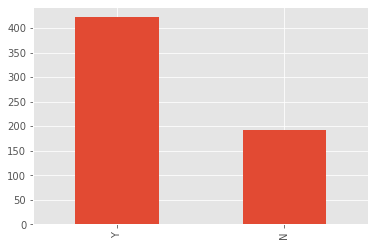

In [19]:
cat_Column(loan_data["Loan_Status"])

Unique data:  ['Male' 'Female' nan] 

Numberof unique data:  2 

What are values of unique data: 
 Male      489
Female    112
Name: Gender, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


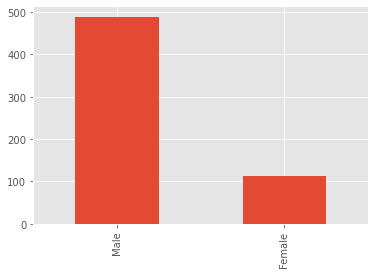

In [20]:
cat_Column(loan_data["Gender"])

In [21]:
# When consider the gender column maximum male candidates are apply for the loan

Unique data:  ['No' 'Yes' nan] 

Numberof unique data:  2 

What are values of unique data: 
 Yes    398
No     213
Name: Married, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


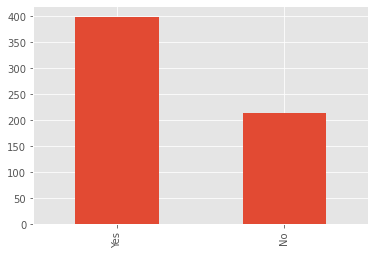

In [22]:
cat_Column(loan_data["Married"])

In [23]:
# When consider the Married column maximum yes candidates are apply for the loan

Unique data:  ['0' '1' '2' '3+' nan] 

Numberof unique data:  4 

What are values of unique data: 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


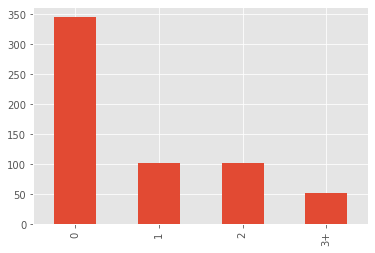

In [24]:
cat_Column(loan_data["Dependents"])

Unique data:  [ 1.  0. nan] 

Numberof unique data:  2 

What are values of unique data: 
 1.0    475
0.0     89
Name: Credit_History, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


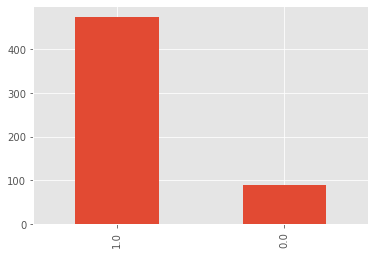

In [25]:
cat_Column(loan_data["Credit_History"])

Unique data:  ['Graduate' 'Not Graduate'] 

Numberof unique data:  2 

What are values of unique data: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


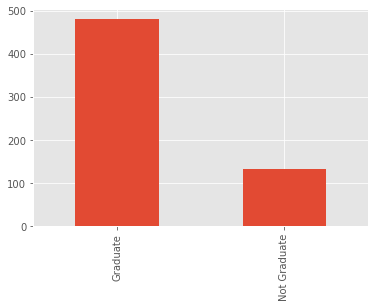

In [26]:
cat_Column(loan_data["Education"])

Unique data:  ['No' 'Yes' nan] 

Numberof unique data:  2 

What are values of unique data: 
 No     500
Yes     82
Name: Self_Employed, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


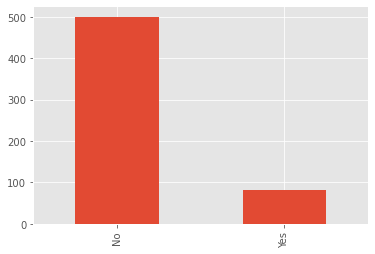

In [27]:
cat_Column(loan_data["Self_Employed"])

Unique data:  ['Urban' 'Rural' 'Semiurban'] 

Numberof unique data:  3 

What are values of unique data: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


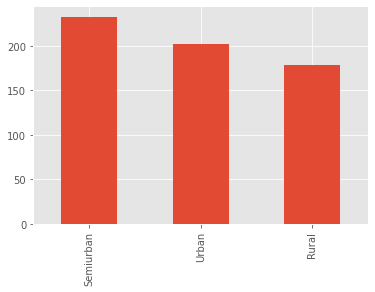

In [28]:
cat_Column(loan_data["Property_Area"])

Unique data:  ['Y' 'N'] 

Numberof unique data:  2 

What are values of unique data: 
 Y    422
N    192
Name: Loan_Status, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


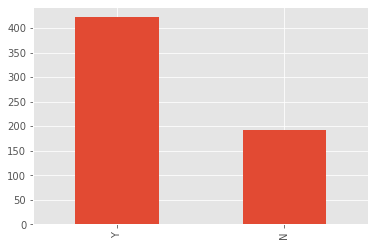

In [29]:
cat_Column(loan_data["Loan_Status"])

In [30]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
loan_data.select_dtypes(np.number)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [32]:
loan_data.select_dtypes(np.object)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [33]:
data=loan_data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

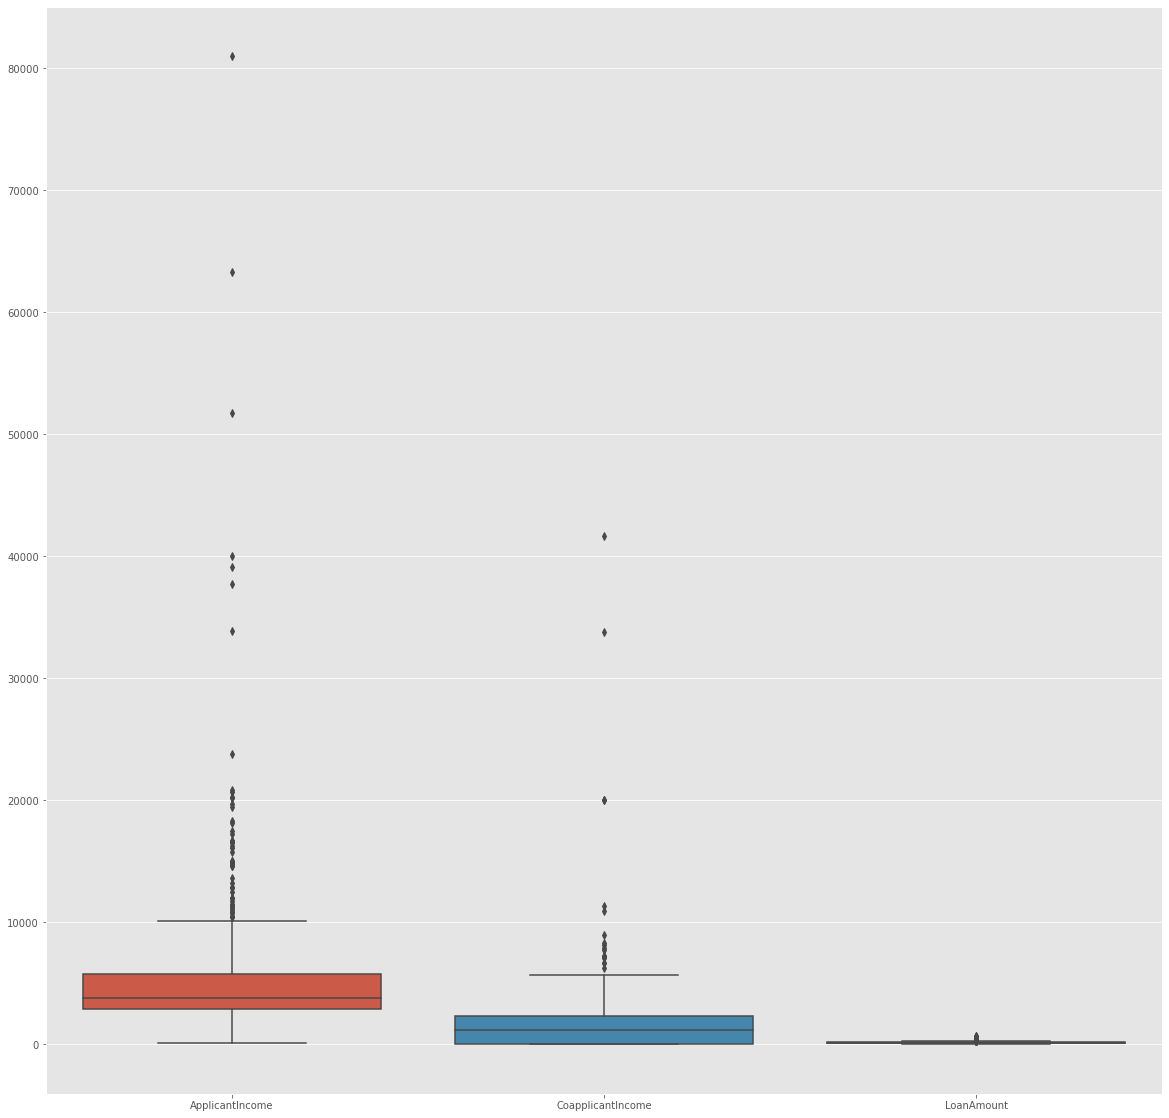

In [34]:
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= data, ax = ax)
plt.show()

In [35]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


## Univariate Analysis
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

## Visualizing each variable

Different types of variables in our dataset are Categorical, ordinal and numerical.

    Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

    Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

    Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

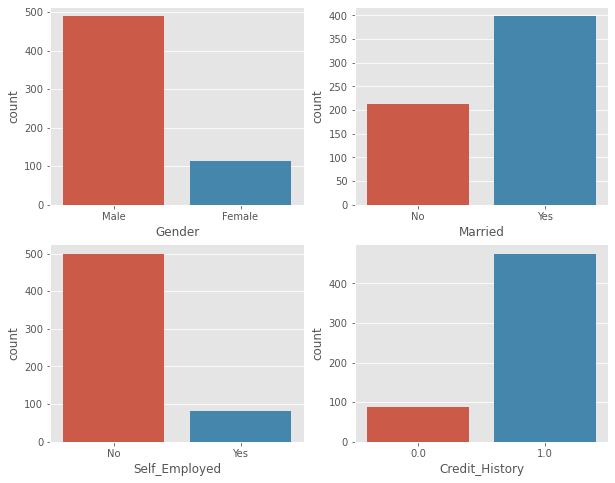

In [37]:
# Analyzing independent variable (Categorical)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x='Gender',data=loan_data)
# plt.title('Gender')
plt.subplot(2,2,2)
sns.countplot(x='Married',data=loan_data)
# plt.title('Married')
plt.subplot(2,2,3)
sns.countplot(x='Self_Employed',data=loan_data)
# plt.title('Self_Employed')
plt.subplot(2,2,4)
sns.countplot(x='Credit_History',data=loan_data)
# plt.title('Credit_History')
plt.show()

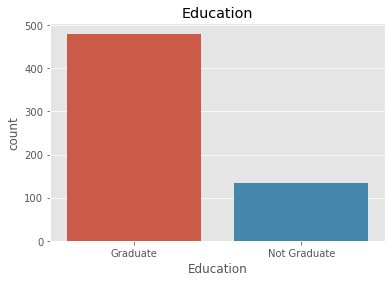

In [38]:
sns.countplot(x='Education',data=loan_data)
plt.title('Education')
plt.show()

In [39]:
loan_data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Observations from above plots:

    Nearly 80% of the applicants in dataset are Male.
    Nearly 65% of the applicants in dataset are Married.
    Nearly 15% of the applicants in dataset are Self Employed.
    Nearly 85% of the applicants have repaid their debts.
    Nearly 79% of the applicants in dataset are Graduate.

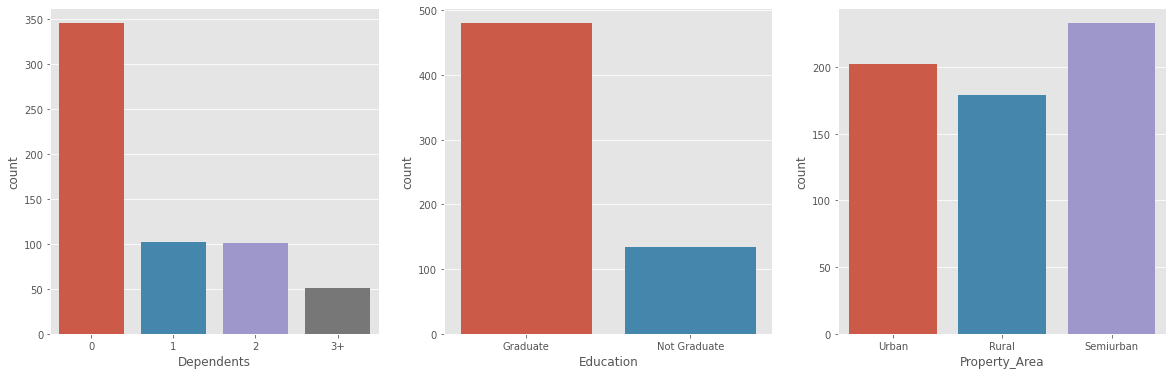

In [40]:
# Analyzing Independent variable (Ordinal)


plt.figure(figsize=(20,6))
plt.figure(num=1)

plt.subplot(1,3,1)
sns.countplot(x='Dependents', data=loan_data)
plt.subplot(1,3,2)
sns.countplot(x='Education', data=loan_data)
plt.subplot(1,3,3)
sns.countplot(x='Property_Area', data=loan_data)
plt.show()

Observations can be made from above barplots:

    Most of the applicants doesn't have any dependents.
    Around 80% of the applicants are Graduate.
    Most of the applicants are form Semi-Urban Area

In [41]:
def numdata(data):
    plt.figure(figsize=(20,20))
    plt.subplot(3,2,1)
    sns.distplot(data,bins=30)
    
    plt.subplot(3,2,2)
    sns.boxplot(data)
    plt.tight_layout()
    
    plt.subplot(3,2,3)
    plt.hist(data)
    plt.show()
    
    

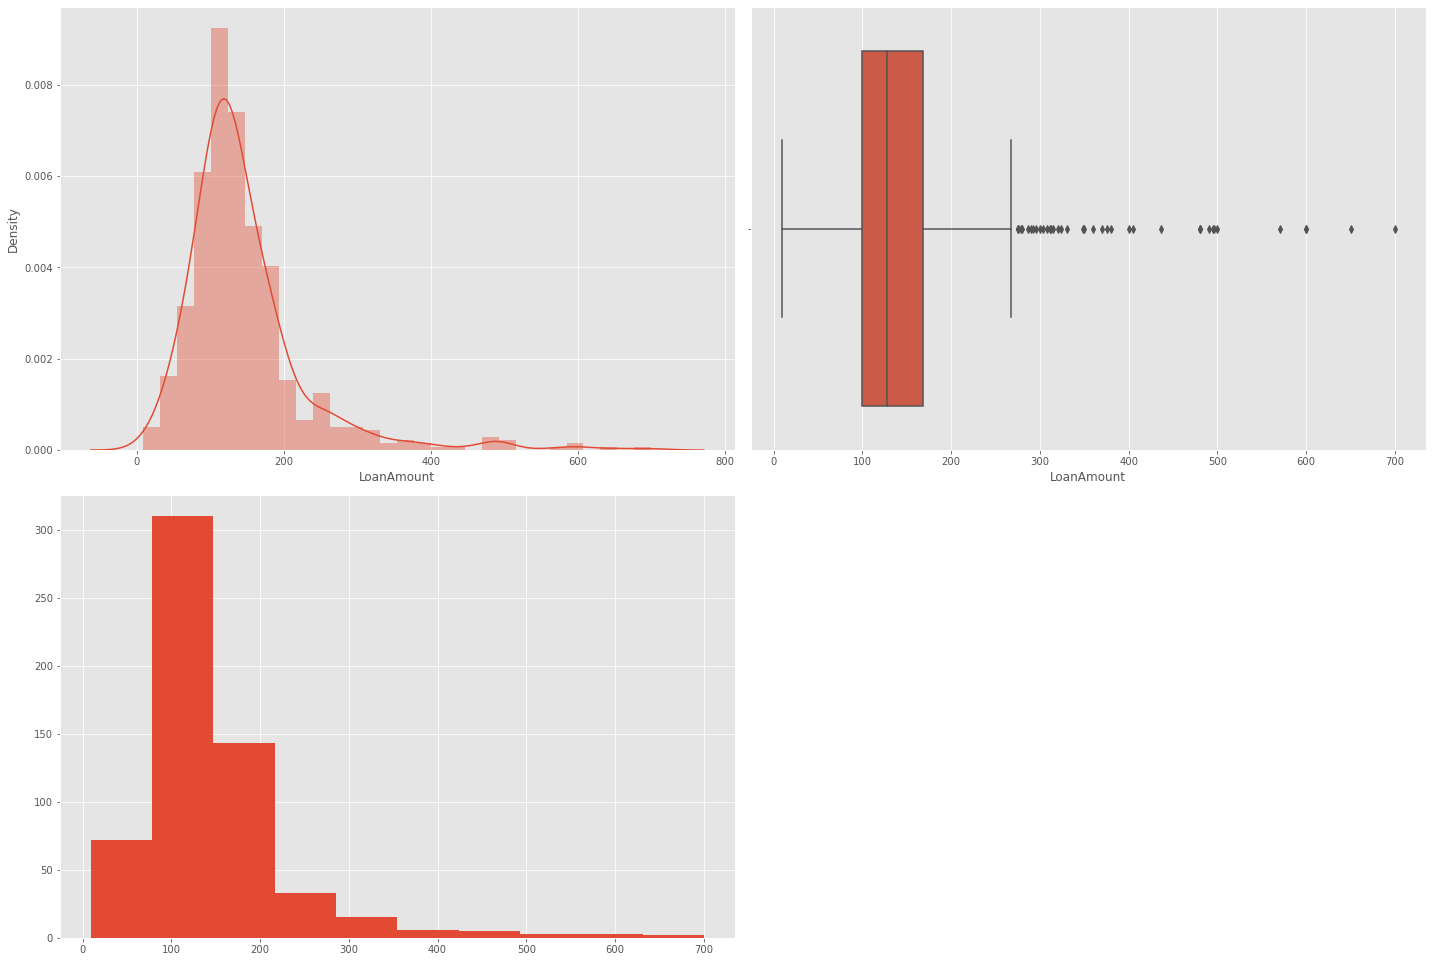

In [42]:
numdata(loan_data["LoanAmount"])

We see a lot of outliers in LoanAmount is variable and the distribution is fairly normal.

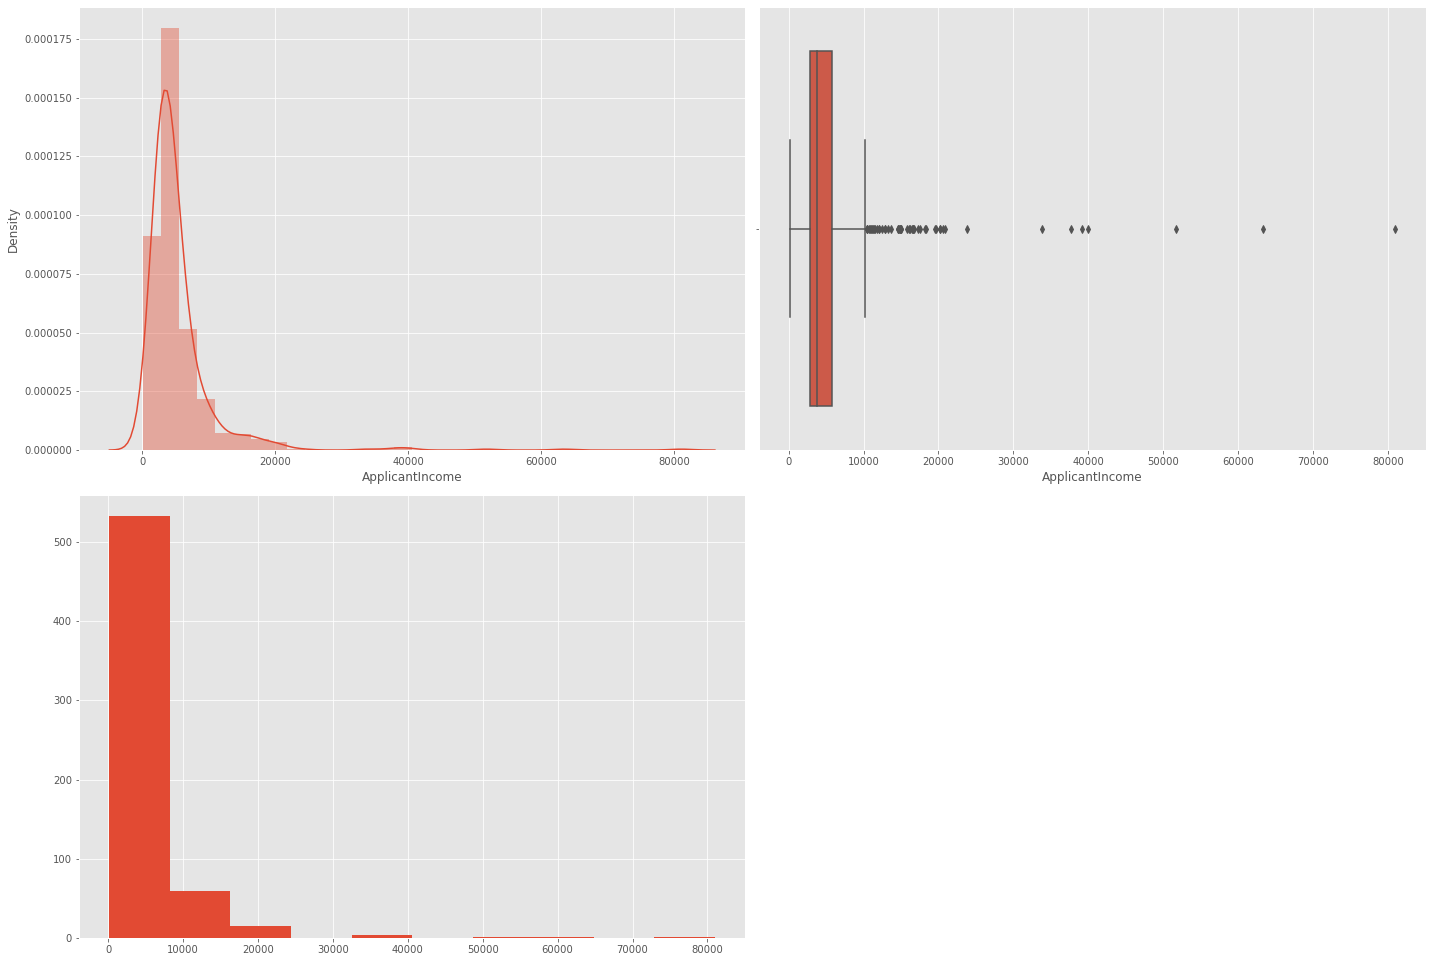

In [43]:
numdata(loan_data["ApplicantIncome"])

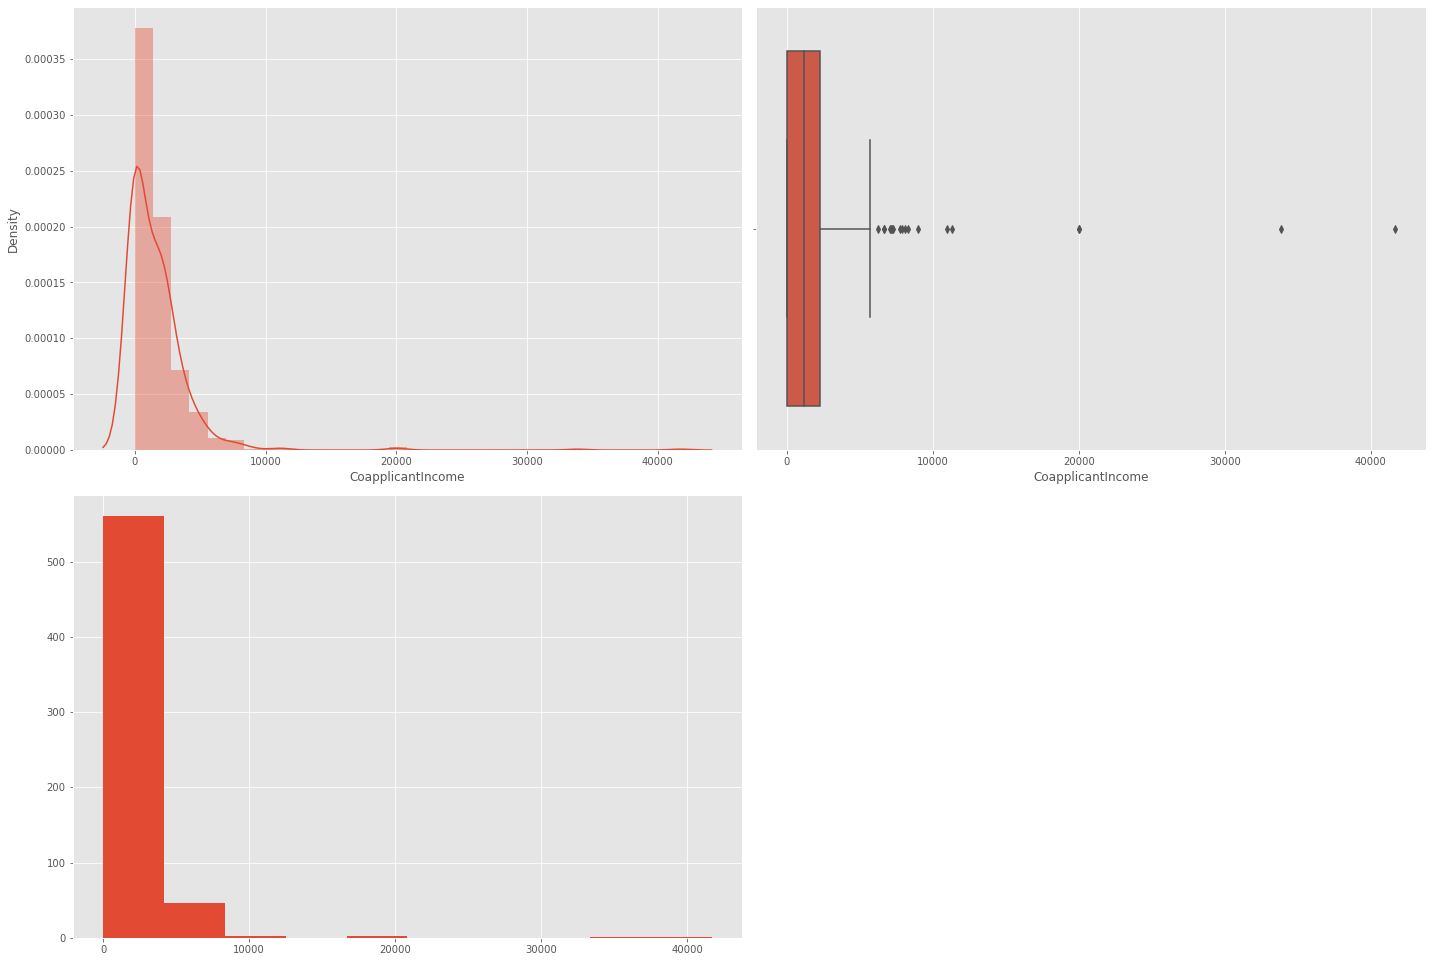

In [44]:
numdata(loan_data["CoapplicantIncome"])

We see a similar distribution as that applicant income. Majority of coapplicant's income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Observation:
    
    It can be inferred that most of the data in distribution of applicant income is towards left  which means it is not normally distributed. We will try to make it normal later as algorithms works better if the dta is normally distributed.

    The boxplot confirms the presence of a lot of outliers/extreene values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that     we are  looking at people with different education levels.

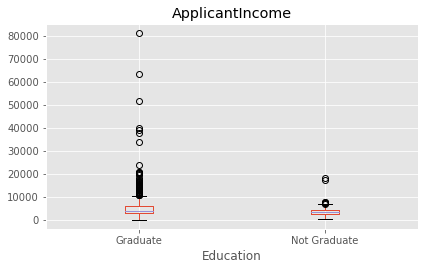

In [45]:
loan_data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.tight_layout()

Grauduate people have high income than those who are Non-Graduate.

Let's see ApplicantIncome factor for Marital Status and Employed type

Text(0.5, 0.98, ' ')

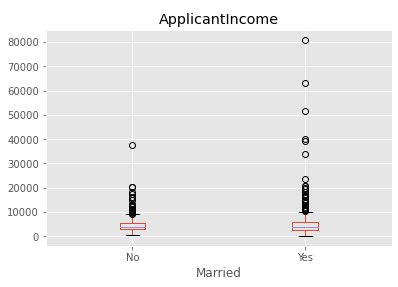

In [46]:
loan_data.boxplot(column='ApplicantIncome', by='Married')
plt.suptitle(' ')

Married applicants has large amout-range of income

Text(0.5, 0.98, ' ')

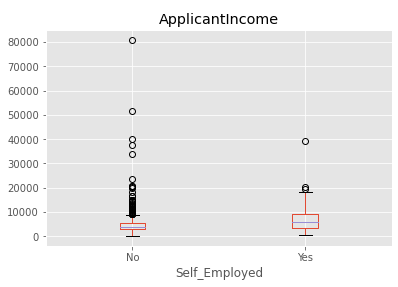

In [47]:
loan_data.boxplot(column='ApplicantIncome', by='Self_Employed')
plt.suptitle(' ')

Those are Self-Employed (business, freelancing, etc.) has lower income amount-range than applicants who are Employed.

# Bivariate Analysis
we will compare each variable against the target variable i.e loan status.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


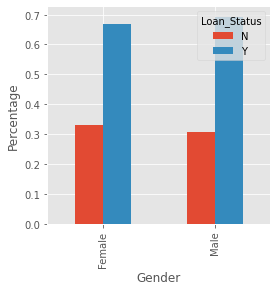

In [48]:
print(pd.crosstab(loan_data['Gender'],loan_data['Loan_Status']))

Gender=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Credit_History  0.0  1.0
Gender                  
Female           17   84
Male             69  382


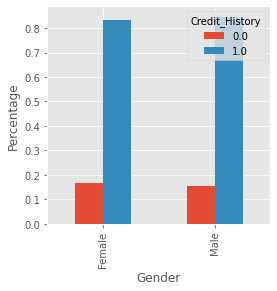

In [49]:
print(pd.crosstab(loan_data['Gender'],loan_data['Credit_History']))

Gender=pd.crosstab(loan_data['Gender'],loan_data['Credit_History'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

In [50]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Gender   Female  Male
Married              
No           80   130
Yes          31   357


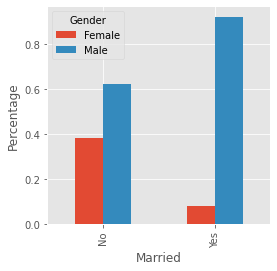

In [51]:
print(pd.crosstab(loan_data['Married'],loan_data['Gender']))

Gender=pd.crosstab(loan_data['Married'],loan_data['Gender'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Credit_History  0.0  1.0
Married                 
No               32  167
Yes              57  305


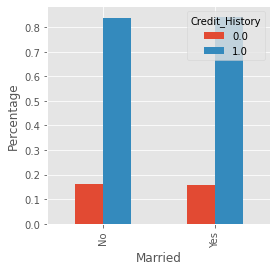

In [52]:
print(pd.crosstab(loan_data['Married'],loan_data['Credit_History']))

Gender=pd.crosstab(loan_data['Married'],loan_data['Credit_History'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


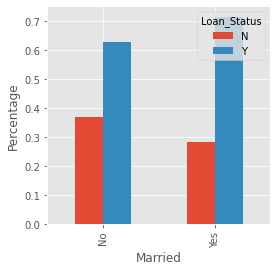

In [53]:
print(pd.crosstab(loan_data['Married'],loan_data['Loan_Status']))

Married=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


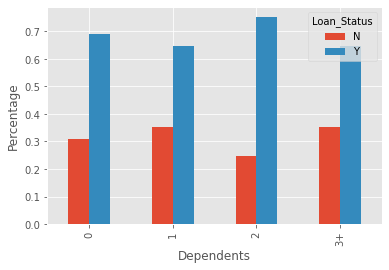

In [54]:
print(pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status']))

Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Credit_History  0.0  1.0
Dependents              
0                45  271
1                14   76
2                14   81
3+               11   37


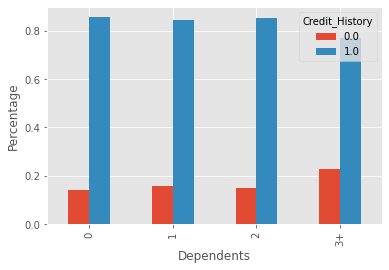

In [55]:
print(pd.crosstab(loan_data['Dependents'],loan_data['Credit_History']))

Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Credit_History'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Married      No  Yes
Dependents          
0           171  174
1            23   79
2             8   93
3+            7   44


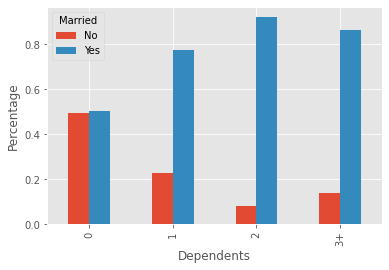

In [56]:
print(pd.crosstab(loan_data['Dependents'],loan_data['Married']))

Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Married'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


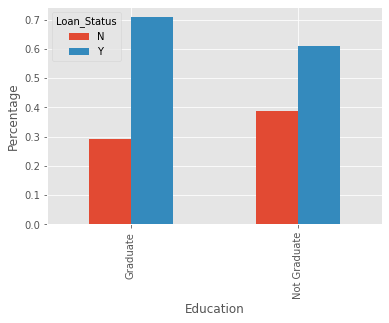

In [57]:
print(pd.crosstab(loan_data['Education'],loan_data['Loan_Status']))

Dependents=pd.crosstab(loan_data['Education'],loan_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


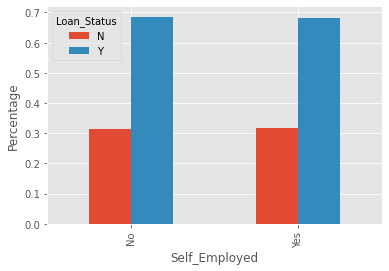

In [58]:
print(pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status']))

Dependents=pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


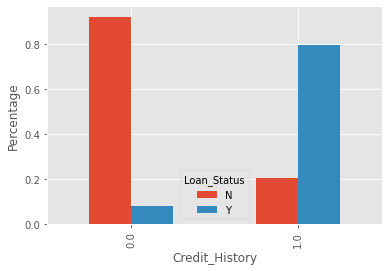

In [59]:
print(pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status']))

Dependents=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


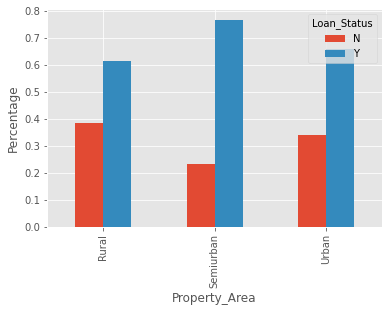

In [60]:
print(pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status']))

Dependents=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
p = plt.ylabel('Percentage')

## Missing Value

In [62]:
print("Number of missing values each columns: ","\n",loan_data.isnull().sum())
print("======"*15)
print("percentage of missing values each columns: ","\n",loan_data.isnull().sum()/len(loan_data)*100)

Number of missing values each columns:  
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
percentage of missing values each columns:  
 Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [63]:
# visualize the each column missing values: 

<AxesSubplot:>

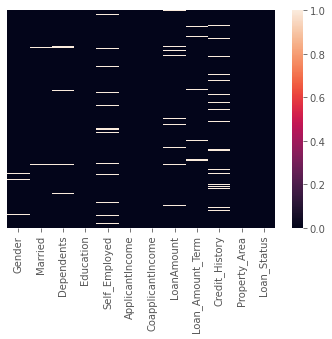

In [64]:
sns.heatmap(loan_data.isnull(), yticklabels=False)

# shows that those column missing values

<AxesSubplot:>

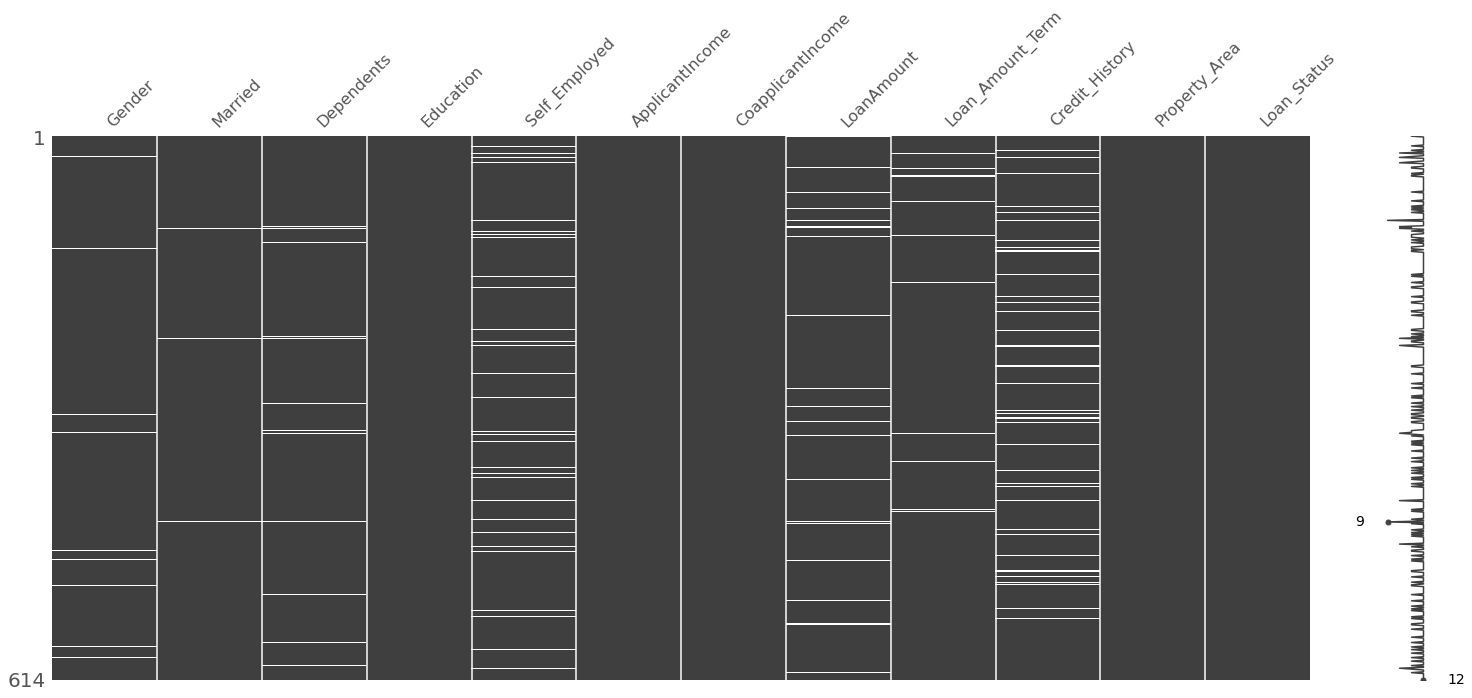

In [65]:
msno.matrix(loan_data)

<AxesSubplot:>

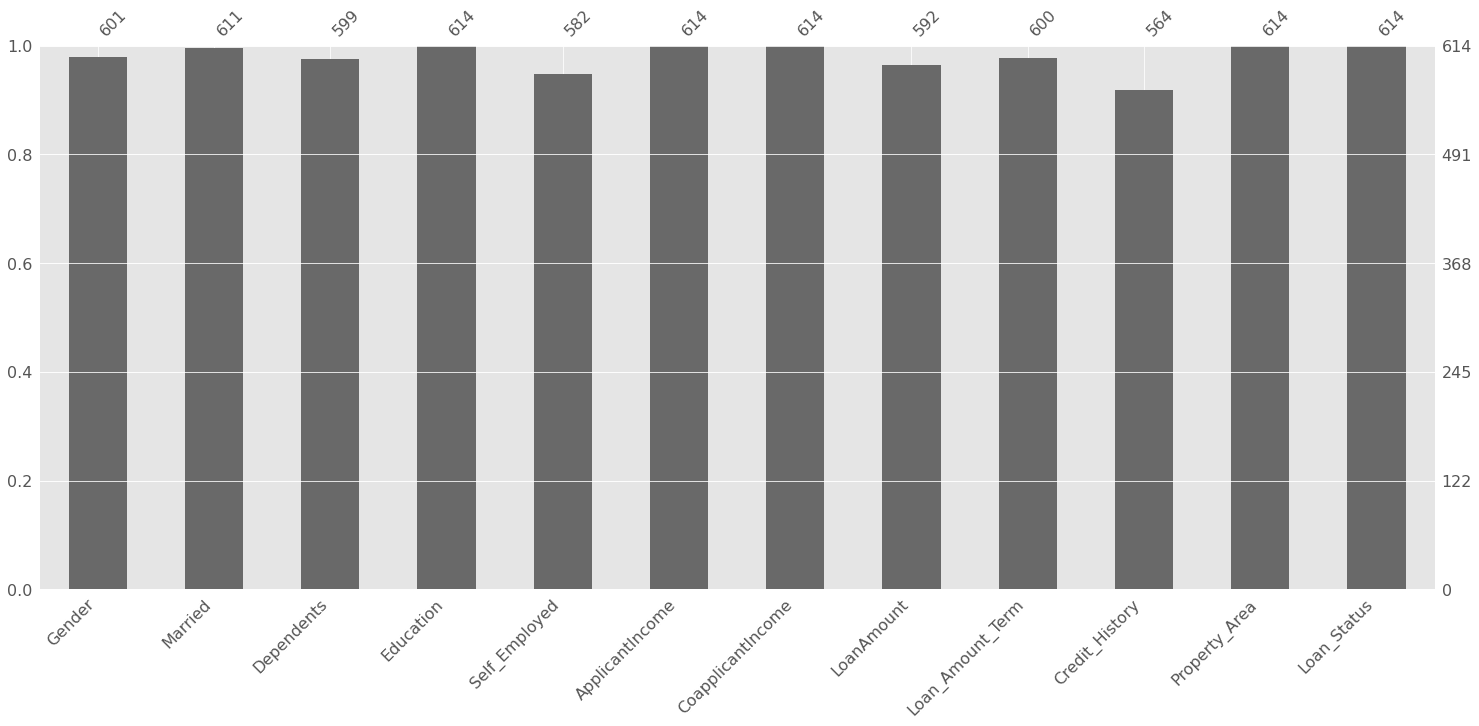

In [66]:
msno.bar(loan_data)

360.0
0    360.0
dtype: float64


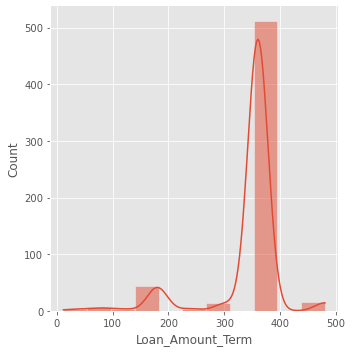

In [67]:
loan_data['Loan_Amount_Term'].mean()
print(loan_data['Loan_Amount_Term'].median())
print(loan_data['Loan_Amount_Term'].mode())
sns.displot(loan_data, x="Loan_Amount_Term",kde=True)

In [68]:
# Impute missing values for Gender
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)

# Impute missing values for Self_Employed
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)

# Impute missing values for LoanAmount
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace=True)

# Impute missing values for Loan_Amount_Term
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(),inplace=True)

We can see that the 'LoanAmount' feature is highly affected by the presence of lot of outliers, so replacing the missing values by the mean() of the feature will not be the correct approach here.
Thus to impute these missing values we will use the median() of the feature.

In [69]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
loan_data["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# convert the categorical column to numerical columns(label encoding):

convert the categorical column to numerical columns(label encoding):

In [77]:
loan_data.select_dtypes(np.object).head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [78]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']

for column in columns:
    loan_data[column] = LabelEncoder().fit_transform(loan_data[column])
    
    
#replace function or mapping function is also used    

In [79]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


    gender = male-1 and female-0
    Married= no=0 and yes=1
    Education= Graduate-0 and notGraduate=1
    Self_Employed =no=0 and yes=1
    Property_Area= urban=2 rural=0 semi=1
    Loan_Status= y=1 and n=0


In [80]:
loan_data["Dependents"].value_counts()
loan_data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)

# Data Visualiztion

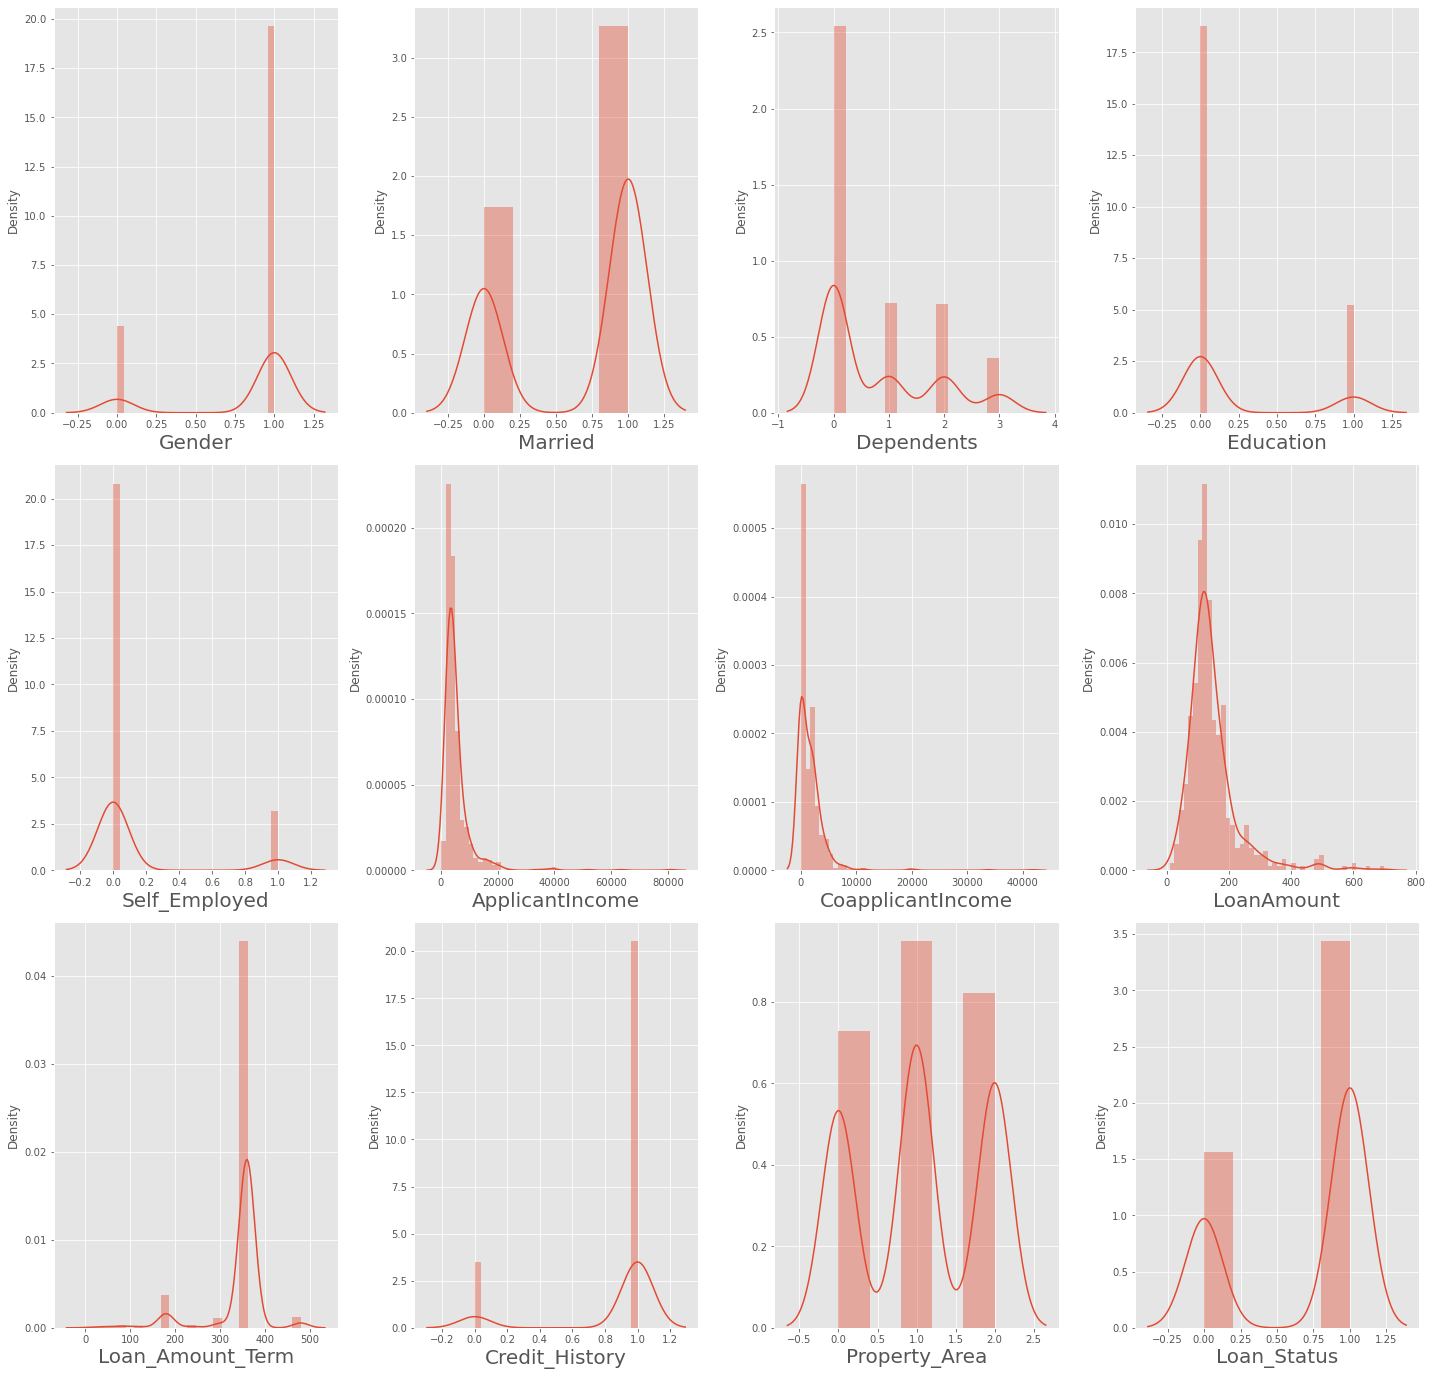

In [81]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in loan_data:
    if plotnumber<=13 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(loan_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Education', ylabel='count'>

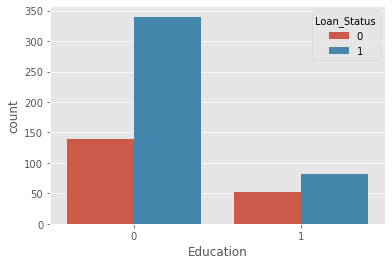

In [82]:
## Education and loan status

sns.countplot(x="Education",hue="Loan_Status",data=loan_data)


# Education= Graduate-0 and notGraduate=1
#Loan_Status= y=1 and n=0

<AxesSubplot:xlabel='Married', ylabel='count'>

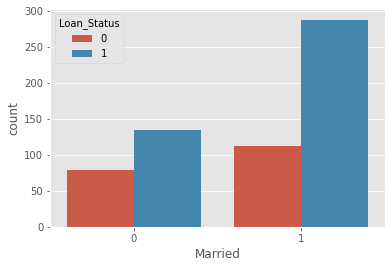

In [83]:
## marital and loan status
#Married= no=0 and yes=1

sns.countplot(x="Married",hue="Loan_Status",data=loan_data)


<AxesSubplot:xlabel='Gender', ylabel='count'>

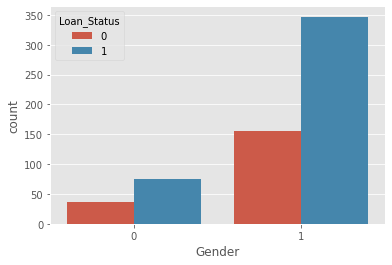

In [84]:
sns.countplot(x="Gender",hue="Loan_Status",data=loan_data)

#gender = male-1 and female-0

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

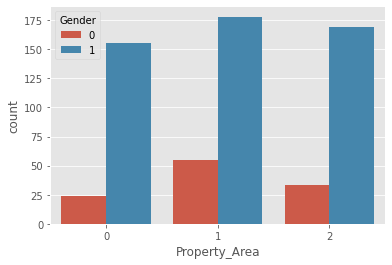

In [85]:
sns.countplot(x="Property_Area",hue="Gender",data=loan_data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

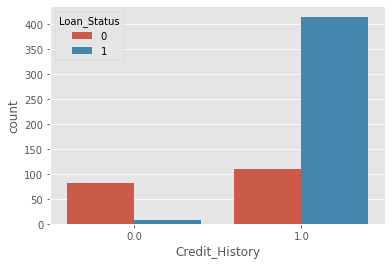

In [86]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=loan_data)

The credit history vs Loan Status indicates:

    The good credit history applicants have more chances of getting Loan.
    With better credit History the Loan amount given was greater too.
    But many were not given loan in the range 0-100
    The applicant with poor credit history were handled in the range 0-100 only.

<AxesSubplot:xlabel='Credit_History'>

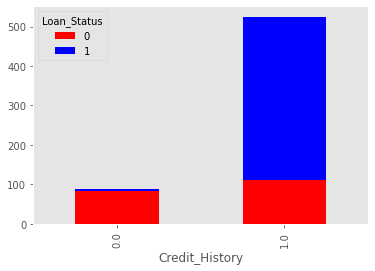

In [87]:
lc = pd.crosstab(loan_data['Credit_History'], loan_data['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [88]:
# Outlier Tratment:

#### ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']has skeweed data, means it contains outlier or vut here outlier is maximum amount of a person so remove skewness apply log transformation.

#### In general, for right-skewed data, the log-transformation may make it either right-or left-skewed. If the original data does follow a log-normal distribution, the log-transformed data will follow or approximately follow the normal distribution.

AxesSubplot(0.125,0.125;0.775x0.755)


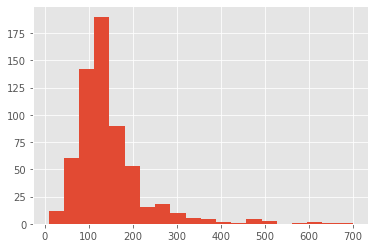

In [89]:
# Removing skewness in LoanAmount variable by log transformation
print(loan_data['LoanAmount'].hist(bins=20))


<AxesSubplot:>

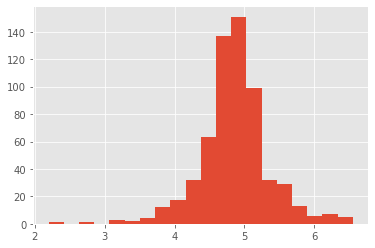

In [90]:
loan_data['LoanAmount'] = np.log(loan_data['LoanAmount'])

loan_data['LoanAmount'].hist(bins=20)

<AxesSubplot:>

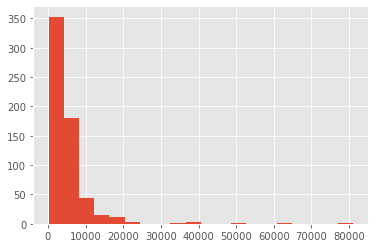

In [91]:
# Removing skewness in ApplicantIncome variable by log transformation
loan_data['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

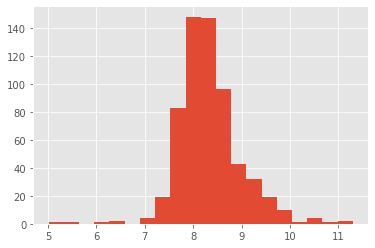

In [92]:
loan_data['ApplicantIncome'] = np.log(loan_data['ApplicantIncome'])

loan_data['ApplicantIncome'].hist(bins=20)

In [93]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,4.852030,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0,1
610,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0,1
611,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2,1
612,1,1,2,0,0,8.933664,0.0,5.231109,360.0,1.0,2,1


In [94]:
## Feature Selection

In [95]:
corr=loan_data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.084514,0.082912,0.143388,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.021424,0.075948,0.179802,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.115816,0.030430,0.156737,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.181713,-0.062290,-0.145885,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.189821,-0.016100,0.109677,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.084514,0.021424,0.115816,-0.181713,0.189821,1.000000,-0.237900,0.491332,-0.031731,0.013468,-0.029484,0.010977
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.237900,1.000000,0.206330,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.143388,0.179802,0.156737,-0.145885,0.109677,0.491332,0.206330,1.000000,0.085353,-0.018547,-0.095250,-0.037997
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.031731,-0.059383,0.085353,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.013468,0.011134,-0.018547,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

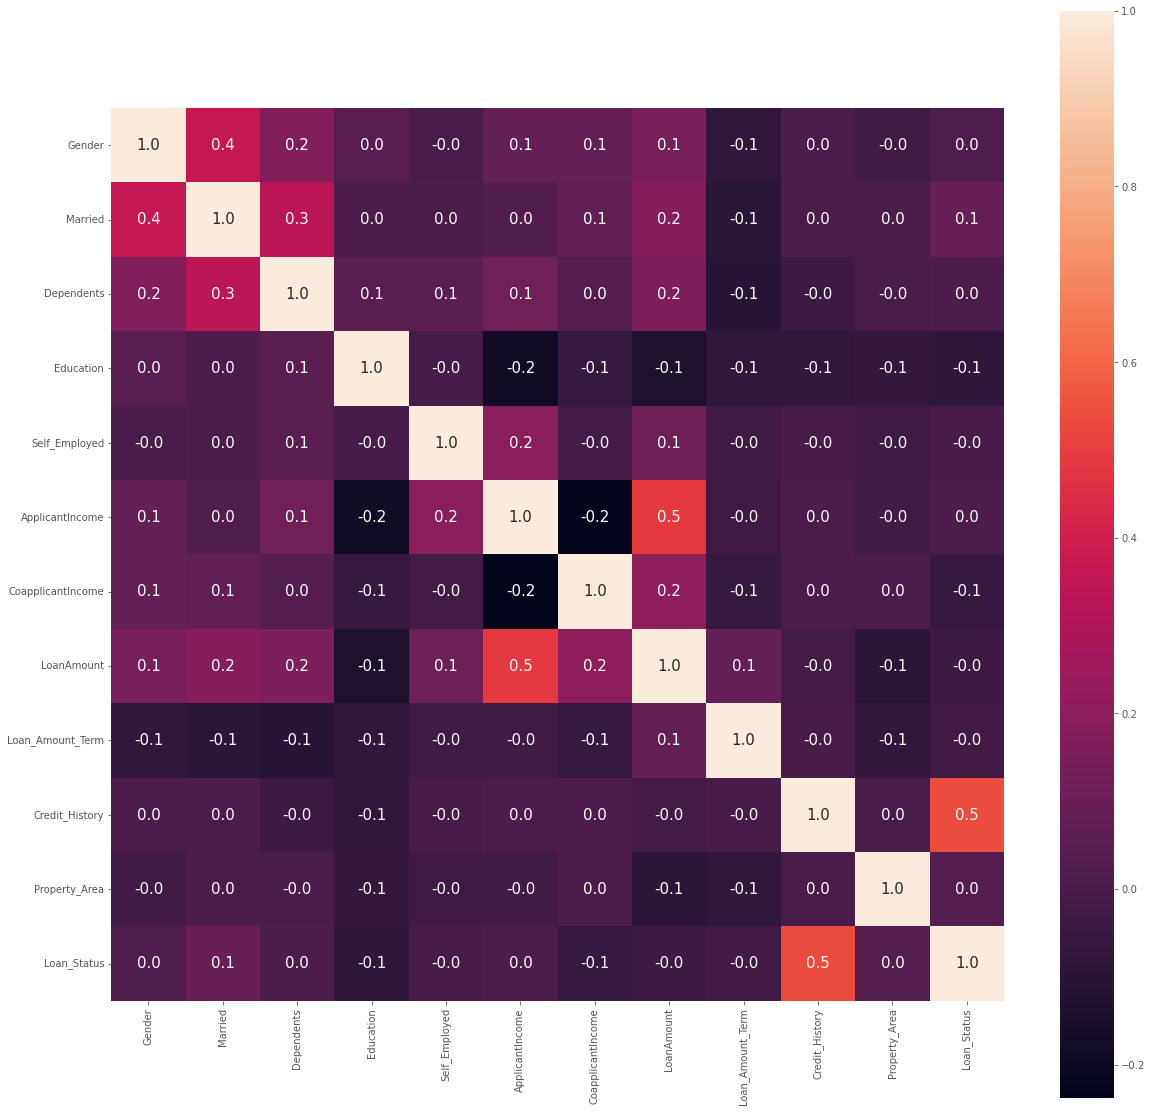

In [96]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

In [97]:
## in this heatmap looks that there is no corealation between the independent variable

#condtion(0.7< high)

# Min_Max Scaler

In [103]:
loan_data.select_dtypes("float64")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,8.674026,0.0,4.852030,360.0,1.0
1,8.430109,1508.0,4.852030,360.0,1.0
2,8.006368,0.0,4.189655,360.0,1.0
3,7.856707,2358.0,4.787492,360.0,1.0
4,8.699515,0.0,4.948760,360.0,1.0
...,...,...,...,...,...
609,7.972466,0.0,4.262680,360.0,1.0
610,8.320205,0.0,3.688879,180.0,1.0
611,8.996157,240.0,5.533389,360.0,1.0
612,8.933664,0.0,5.231109,360.0,1.0


In [104]:
loan_data.select_dtypes("float64")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,8.674026,0.0,4.852030,360.0,1.0
1,8.430109,1508.0,4.852030,360.0,1.0
2,8.006368,0.0,4.189655,360.0,1.0
3,7.856707,2358.0,4.787492,360.0,1.0
4,8.699515,0.0,4.948760,360.0,1.0
...,...,...,...,...,...
609,7.972466,0.0,4.262680,360.0,1.0
610,8.320205,0.0,3.688879,180.0,1.0
611,8.996157,240.0,5.533389,360.0,1.0
612,8.933664,0.0,5.231109,360.0,1.0


In [105]:
loan_data.select_dtypes("float64").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [106]:
for col in loan_data.columns:
    
    col_min = loan_data[col].min()
    col_max = loan_data[col].max()

    loan_data[col] = (loan_data[col] - col_min) / (col_max - col_min)

In [107]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.582270,0.000000,0.609760,0.743590,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.543501,0.036192,0.609760,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.476150,0.000000,0.457624,0.743590,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.452363,0.056592,0.594936,0.743590,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.586321,0.000000,0.631977,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.470762,0.000000,0.474397,0.743590,1.0,0.0,1.0
610,1.0,1.0,1.000000,0.0,0.0,0.526032,0.000000,0.342605,0.358974,1.0,0.0,1.0
611,1.0,1.0,0.333333,0.0,0.0,0.633470,0.005760,0.766255,0.743590,1.0,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.623537,0.000000,0.696827,0.743590,1.0,1.0,1.0


The range of continuous features are different. Here, I am scaling them to be in-between 0 to 1 by dividing by the maximum value of the respective column (min max scaler).

In this Dataframe maximum columns are categorical columns and and the values are between o to 1

To create a better model scaling the continous column data because with out scaling create a model, then model will be focous on the maximaum range value column so scaling the columns which gives best accuracy.

# Model Bulding

In [108]:
"""Sklearn requires the target variable in a separate dataset.
so, we will drop our target variable from the train dataset and save it in another dataset."""

X = loan_data.drop(columns=['Loan_Status'])
y=loan_data["Loan_Status"]             # Save target variable in separate dataset

In [109]:
print("Split the data into training and test set")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

Split the data into training and test set


In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(460, 11)
(460,)
(154, 11)
(154,)


In [111]:
print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(X_train.shape, y_train.shape))
print('X test : {}, y test: {}'.format(X_test.shape, y_test.shape))
print('-'*100)

------------------------------  Shape of train and test dataset  ------------------------------
X train : (460, 11), y train: (460,)
X test : (154, 11), y test: (154,)
----------------------------------------------------------------------------------------------------


# Logistic Regression

In [112]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_hat=LR.predict(X_train)

print("Train data score","{:.2%}".format(LR.score(X_train, y_train)))

Train data score 82.17%


In [114]:
y_hat=LR.predict(X_train)
accuracy_score(y_train,y_hat)


0.8217391304347826

In [115]:
pred_cv=LR.predict(X_test)
accuracy_score(y_test,pred_cv)

0.7727272727272727

In [116]:
roc_auc_score(y_test, pred_cv, average=None)

0.6887037037037037

In [117]:
accuracy_1=metrics.accuracy_score(y_test,pred_cv)
recall_1= metrics.recall_score(y_test,pred_cv)
Precision_1=metrics.precision_score(y_test,pred_cv)
f1_score_1=metrics.f1_score(y_test,pred_cv)

In [118]:
print("Confusion_matrix accuracy_1 :",accuracy_1)
print("Confusion_matrix precision_1 :",Precision_1)
print("Confusion_matrix recall_1 :",recall_1)
print("Confusion_matrix f1_score_1 :",f1_score_1)

Confusion_matrix accuracy_1 : 0.7727272727272727
Confusion_matrix precision_1 : 0.751937984496124
Confusion_matrix recall_1 : 0.97
Confusion_matrix f1_score_1 : 0.8471615720524017


## Decision Tree

In [119]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
y_DT=DT.predict(X_train)
accuracy_score(y_train,y_DT)

1.0

In [121]:
pred_DT=DT.predict(X_test)
accuracy_score(y_test,pred_DT)

0.6623376623376623

In [122]:
roc_auc_score(y_test, pred_DT, average=None)

0.6420370370370371

In [123]:
accuracy_2=metrics.accuracy_score(y_test,pred_DT)
recall_2= metrics.recall_score(y_test,pred_DT)
Precision_2=metrics.precision_score(y_test,pred_DT)
f1_score_2=metrics.f1_score(y_test,pred_DT)

In [124]:
print("Confusion_matrix accuracy_2 :",accuracy_2)
print("Confusion_matrix precision_2 :",Precision_2)
print("Confusion_matrix recall_2 :",recall_2)
print("Confusion_matrix f1_score_2 :",f1_score_2)

Confusion_matrix accuracy_2 : 0.6623376623376623
Confusion_matrix precision_2 : 0.7553191489361702
Confusion_matrix recall_2 : 0.71
Confusion_matrix f1_score_2 : 0.731958762886598


# Random Forest

In [125]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [126]:
y_RF=RF.predict(X_train)
accuracy_score(y_train,y_RF)

1.0

In [127]:
pred_RF=RF.predict(X_test)
accuracy_score(y_test,pred_RF)

0.7597402597402597

In [128]:
roc_auc_score(y_test, pred_RF, average=None)

0.682962962962963

In [129]:
accuracy_3=metrics.accuracy_score(y_test,pred_RF)
recall_3= metrics.recall_score(y_test,pred_RF)
Precision_3=metrics.precision_score(y_test,pred_RF)
f1_score_3=metrics.f1_score(y_test,pred_RF)

In [130]:
print("Confusion_matrix accuracy_3 :",accuracy_3)
print("Confusion_matrix precision_3 :",Precision_3)
print("Confusion_matrix recall_3 :",recall_3)
print("Confusion_matrix f1_score_3 :",f1_score_3)

Confusion_matrix accuracy_3 : 0.7597402597402597
Confusion_matrix precision_3 : 0.752
Confusion_matrix recall_3 : 0.94
Confusion_matrix f1_score_3 : 0.8355555555555555


# SVC

In [131]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

77.27272727272727

In [132]:
pred = svc.predict(X_train)
accuracy_score(y_train , pred)*100

82.17391304347827

The highest classification accuracy is shown by Logistic Regression => Train data score 82.17%, and test score is 0.7727272727272727 mean there are less amount of error.

by using hyperparameter tuning to avoid the overfiiting conditions.

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [134]:
#we are tuning three hyperparameters right now, we are passing the different values for both parameters
random_param = {
    'penalty': ['l1', 'l2'],
    'dual' : [True,False],
    'tol' : [1e-4, 1e-2],
    'random_state': range(2,10,1),
    'solver' : ['liblinear', 'saga']
    
}

In [135]:
random_search = RandomizedSearchCV(estimator=LR,
                     param_distributions=random_param,
                     cv=5,
                    n_jobs =-1)

In [136]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'dual': [True, False],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': range(2, 10),
                                        'solver': ['liblinear', 'saga'],
                                        'tol': [0.0001, 0.01]})

In [137]:
best_parameters = random_search.best_params_
print(best_parameters)

{'tol': 0.0001, 'solver': 'saga', 'random_state': 5, 'penalty': 'l1', 'dual': False}


In [138]:
random_search.best_score_

0.8217391304347826

In [139]:
model = LogisticRegression(penalty = 'l1', tol =0.0001, solver= "saga" ,random_state =3,dual=False)
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=3, solver='saga')

In [140]:
moedel_tr = model.predict(X_train) # clf=model
model_ts = model.predict(X_test)

Train_accuracy = accuracy_score(y_train, moedel_tr)

Test_accuracy = accuracy_score(y_test, model_ts)

print('The training accuracy is', Train_accuracy)
print('The test accuracy is', Test_accuracy)

The training accuracy is 0.8217391304347826
The test accuracy is 0.7727272727272727


In [141]:
roc_auc_score(y_test, model_ts, average=None)

0.6887037037037037